In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table, vstack
import astropy.units as u

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Georgia',
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix',
    'axes.linewidth': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

## Check dependence of size on redshift/stellar mass

### Redshift

In [201]:
with fits.open('http://www.gama-survey.org/dr4/data/cat/gkvInputCat/v02/gkvScienceCatv02.fits') as cat:
    gkvScienceCat = Table(cat[1].data)

In [ ]:
with fits.open('/data2/lsajkov/mpdg/data/GAMA/gkvScienceCatv02.fits') as cat:
    gkvScienceCat = Table(cat[1].data)

In [202]:
cat_R50 = gkvScienceCat['R50'] #half-light radius ()
cat_z = gkvScienceCat['Z'] #redshift

#cuts:
R50_cut = cat_R50 < 5
z_cut = (cat_z > 0) & (cat_z < 0.5)

total_cut = R50_cut & z_cut

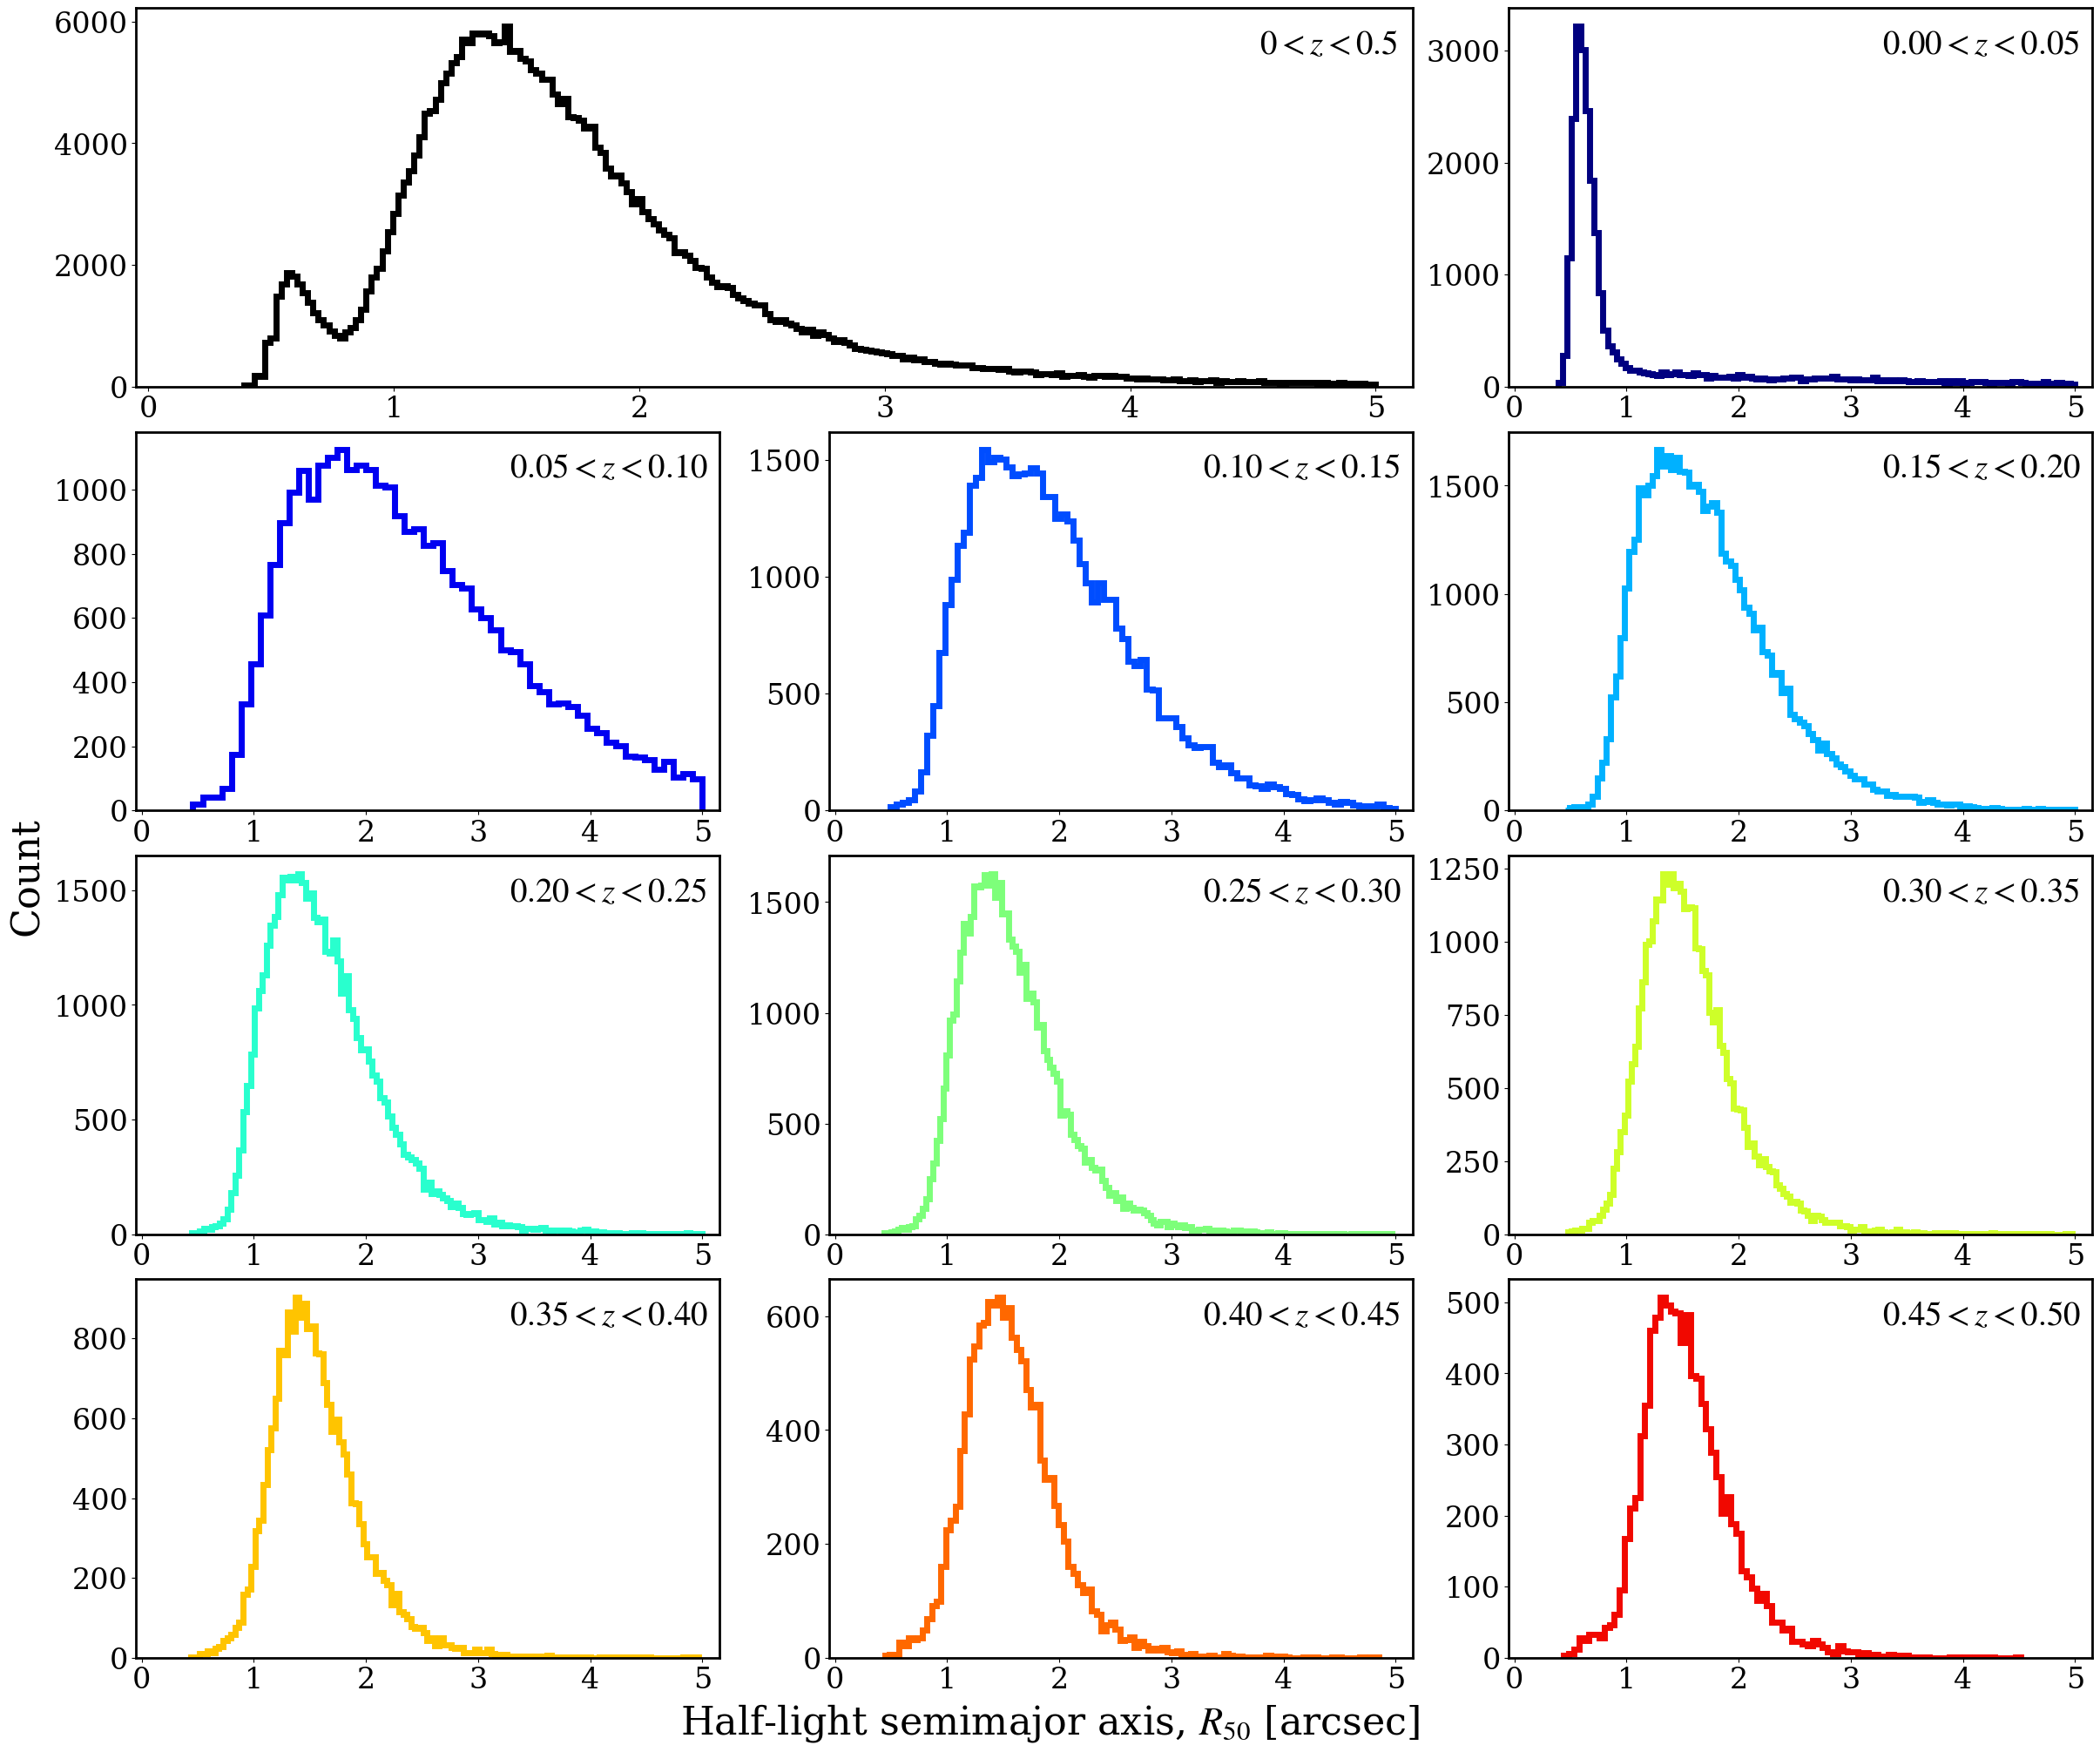

In [204]:
fig = plt.figure(figsize = (24, 20), constrained_layout = True)
gs = fig.add_gridspec(4, 3)

vals, bins = np.histogram(cat_R50[total_cut], bins = 'auto')
ax = fig.add_subplot(gs[0, :2])
ax.stairs(vals, bins, linewidth = 5,
          color = 'black')

ax.text(0.88, 0.88,
        f'$0 < z < 0.5$', fontsize = 28,
        transform = ax.transAxes)

ax.set_xlim(-0.05, 5.15)

for axis in ['top', 'right', 'bottom', 'left']:
    ax.spines[axis].set_linewidth(2)

delta_z = 0.05

i = 2
for z_lo in np.arange(0, 0.5, delta_z):
    z_bin = (z_lo <= cat_z) & (cat_z < z_lo + delta_z)
    vals, bins = np.histogram(cat_R50[total_cut & z_bin], bins = 'auto')
    
    ax = fig.add_subplot(gs[i])
    ax.stairs(vals, bins,
              color = mpl.cm.jet((i - 2)/10), linewidth = 5)

    ax.text(0.64, 0.88,
            f'${z_lo:.2f} < z < {(z_lo + delta_z):.2f}$', fontsize = 28,
            transform = ax.transAxes)
    
    for axis in ['top', 'right', 'bottom', 'left']:
        ax.spines[axis].set_linewidth(2)

    ax.set_xlim(-0.05, 5.15)

    i += 1

fig.supxlabel('Half-light semimajor axis, $R_{50}$ [arcsec]', fontsize = 32)
fig.supylabel('Count', fontsize = 32)

fig.savefig('/data2/lsajkov/mpdg/figures/GAMA/GAMA_size_redshift_dependence.png',
            dpi = 150)

### Stellar mass

In [174]:
with fits.open('/data2/lsajkov/mpdg/data/GAMA/gkvScienceCatv02.fits') as cat:
    gkvScienceCat = Table(cat[1].data)

with fits.open('/data2/lsajkov/mpdg/data/GAMA/StellarMassesGKVv24.fits') as cat:
    StellarMassesGKV = Table(cat[1].data)

In [ ]:
ScienceCat_mstar_mask = [True if uberID in StellarMassesGKV['uberID'] else False\
                         for uberID in gkvScienceCat['uberID']]

In [205]:
with fits.open('/data2/lsajkov/mpdg/data/GAMA/matched_ScienceCat_StellarMassesGKV.fits') as cat:
    ScienceCat_StellarMasses = Table(cat[1].data)

In [206]:
cat_R50 = ScienceCat_StellarMasses['R50'] #half-light radius ()
cat_mstar = ScienceCat_StellarMasses['logmstar'] #redshift

#cuts:
R50_cut = cat_R50 < 5
mstar_cut = (cat_mstar > 6) & (cat_mstar < 11)

total_cut = R50_cut & mstar_cut

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\l'
/var/tmp/lsajkov/ipykernel_841568/1044199225.py:10: SyntaxWarning: invalid escape sequence '\l'
  f'$6 < \log(M_*) < 11$', fontsize = 28,
/var/tmp/lsajkov/ipykernel_841568/1044199225.py:29: SyntaxWarning: invalid escape sequence '\l'
  f'${mstar_lo:.2f} < \log(M_*) < {(mstar_lo + delta_mstar):.2f}$', fontsize = 28,


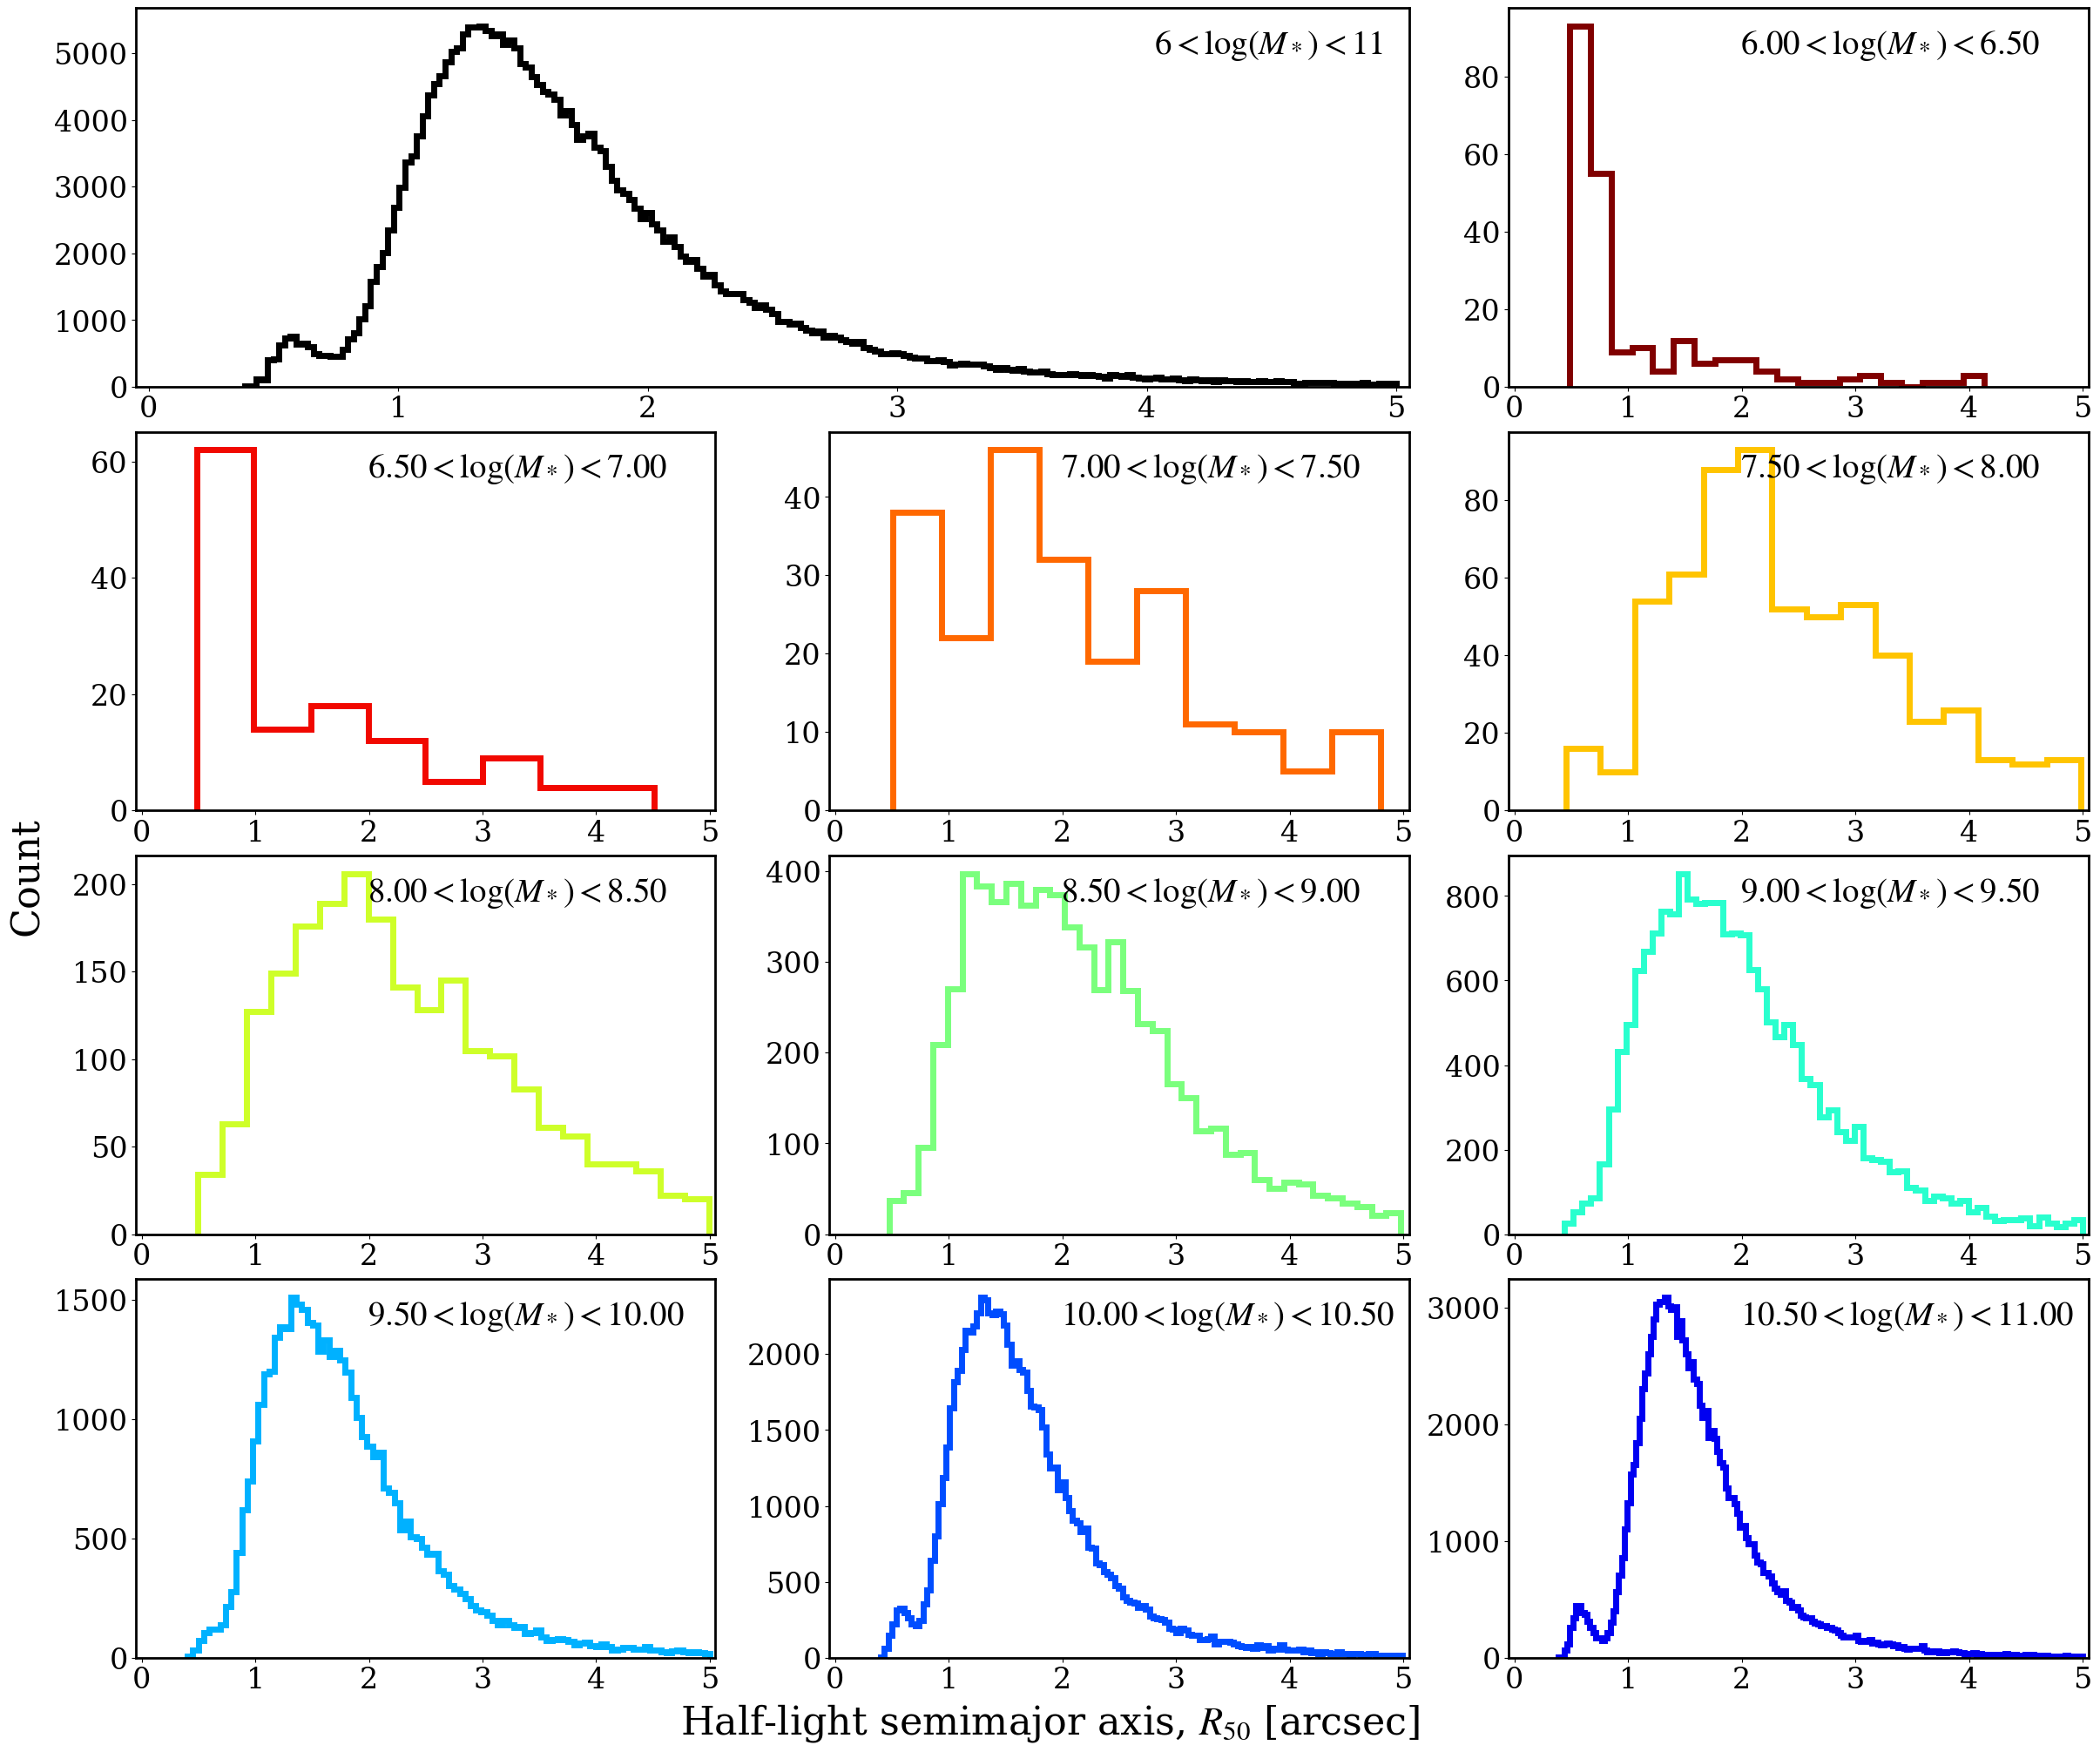

In [224]:
, frameon = Falsefig = plt.figure(figsize = (24, 20), constrained_layout = True)
gs = fig.add_gridspec(4, 3)

vals, bins = np.histogram(cat_R50[total_cut], bins = 'auto')
ax = fig.add_subplot(gs[0, :2])
ax.stairs(vals, bins, linewidth = 5,
          color = 'black')

ax.text(0.8, 0.88,
        f'$6 < \log(M_*) < 11$', fontsize = 28,
        transform = ax.transAxes)

ax.set_xlim(-0.05, 5.05)
for axis in ['top', 'right', 'bottom', 'left']:
    ax.spines[axis].set_linewidth(2)

delta_mstar = 0.5

i = 2
for mstar_lo in np.arange(6, 11, delta_mstar):
    mstar_bin = (mstar_lo <= cat_mstar) & (cat_mstar < mstar_lo + delta_mstar)
    vals, bins = np.histogram(cat_R50[total_cut & mstar_bin], bins = 'auto')
    
    ax = fig.add_subplot(gs[i])
    ax.stairs(vals, bins,
              color = mpl.cm.jet_r((i - 2)/10), linewidth = 5)

    ax.text(0.4, 0.88,
            f'${mstar_lo:.2f} < \log(M_*) < {(mstar_lo + delta_mstar):.2f}$', fontsize = 28,
            transform = ax.transAxes)
    
    for axis in ['top', 'right', 'bottom', 'left']:
        ax.spines[axis].set_linewidth(2)

    ax.set_xlim(-0.05, 5.05)

    i += 1

fig.supxlabel('Half-light semimajor axis, $R_{50}$ [arcsec]', fontsize = 32)
fig.supylabel('Count', fontsize = 32)

fig.savefig('/data2/lsajkov/mpdg/figures/GAMA/GAMA_size_mstar_dependence.png',
            dpi = 150)

### Both redshift and stellar mass

In [129]:
with fits.open('/data2/lsajkov/mpdg/data/GAMA/matched_ScienceCat_StellarMassesGKV.fits') as cat:
    ScienceCat_StellarMasses = Table(cat[1].data)

In [132]:
#construct catalog columns
cat = ScienceCat_StellarMasses

def errJy_to_errABmag(flux_Jy, fluxerr_Jy):
    return -2.5 / (flux_Jy * np.log(10)) * fluxerr_Jy

r_mag = (cat['flux_rt'] * u.Jansky).to(u.ABmag).value
r_mag_err = errJy_to_errABmag(cat['flux_rt'], cat['flux_err_rt'])
r_snr = cat['flux_rt']/cat['flux_err_rt']

g_mag = (cat['flux_gt'] * u.Jansky).to(u.ABmag).value
g_mag_err = errJy_to_errABmag(cat['flux_gt'], cat['flux_err_gt'])
g_snr = cat['flux_gt']/cat['flux_err_gt']

u_mag = (cat['flux_ut'] * u.Jansky).to(u.ABmag).value
u_mag_err = errJy_to_errABmag(cat['flux_ut'], cat['flux_err_ut'])
u_snr = cat['flux_ut']/cat['flux_err_ut']

i_mag = (cat['flux_it'] * u.Jansky).to(u.ABmag).value
i_mag_err = errJy_to_errABmag(cat['flux_it'], cat['flux_err_it'])
i_snr = cat['flux_it']/cat['flux_err_it']

ug_color     = u_mag - g_mag
ug_color_err = np.sqrt(u_mag_err ** 2 + g_mag_err ** 2)

gr_color     = g_mag - r_mag
gr_color_err = np.sqrt(g_mag_err ** 2 + r_mag_err ** 2)

ur_color     = u_mag - r_mag
ur_color_err = np.sqrt(u_mag_err ** 2 + r_mag_err ** 2)

ri_color     = r_mag - i_mag
ri_color_err = np.sqrt(r_mag_err ** 2 + i_mag_err ** 2)

log_mstar     = cat['logmstar']
log_mstar_err = cat['dellogmstar']

R50 = cat['R50']

redshift = cat['Z_1']

/var/tmp/lsajkov/ipykernel_2936566/1352718005.py:13: RuntimeWarning: divide by zero encountered in divide
  g_snr = cat['flux_gt']/cat['flux_err_gt']
/var/tmp/lsajkov/ipykernel_2936566/1352718005.py:17: RuntimeWarning: divide by zero encountered in divide
  u_snr = cat['flux_ut']/cat['flux_err_ut']
/var/tmp/lsajkov/ipykernel_2936566/1352718005.py:21: RuntimeWarning: divide by zero encountered in divide
  i_snr = cat['flux_it']/cat['flux_err_it']


In [133]:
#quality cuts
snr_thresh = 5
snr_cut = (r_snr >= snr_thresh) &\
          (g_snr >= snr_thresh) &\
          (u_snr >= snr_thresh) &\
          (i_snr >= snr_thresh)

redshift_cut = (redshift >= 0) & (redshift < 1)

color_lo = -3
color_hi = 3
color_cut = (gr_color > color_lo) & (gr_color < color_hi) &\
            (ug_color > color_lo) & (ug_color < color_hi) &\
            (ur_color > color_lo) & (ur_color < color_hi) &\
            (ri_color > color_lo) & (ri_color < color_hi)

log_mstar_lo = 6
log_mstar_hi = 12
log_mstar_cut = (log_mstar > log_mstar_lo) & (log_mstar < log_mstar_hi)

R50_cut = R50 < 10

In [134]:
#define primary targeting region
def gr_color_condition(gr_color, gr_color_err,
               r_mag):
    
    return (gr_color - gr_color_err + 0.06 * (r_mag - 14)) < 0.9


def surf_bright_condition(surf_bright_r, surf_bright_r_err,
                                 r_mag):
    
    return (surf_bright_r + surf_bright_r_err\
            - 0.7 * (r_mag - 14)) > 18.5

In [135]:
prt_gr_color_cut = gr_color_condition(gr_color,
                                      gr_color_err,
                                      r_mag)

prt_mag_cut = r_mag > 18

In [136]:
total_cut = snr_cut &\
            redshift_cut &\
            color_cut &\
            log_mstar_cut &\
            R50_cut &\
            prt_gr_color_cut &\
            prt_mag_cut

print('Grand total of cuts:')
print(f'{np.sum(total_cut)}/{len(total_cut)} (~{int(100 * np.sum(total_cut)/len(total_cut))}%)')

Grand total of cuts:
49774/2232985 (~2%)


In [137]:
cat_R50 = ScienceCat_StellarMasses[total_cut]['R50'] #half-light radius ()
cat_z = ScienceCat_StellarMasses[total_cut]['Z_1'] #redshift
cat_mstar = ScienceCat_StellarMasses[total_cut]['logmstar'] 

In [37]:
cat_R50 = ScienceCat_StellarMasses['R50'] #half-light radius ()
cat_z = ScienceCat_StellarMasses['Z_1'] #redshift
cat_mstar = ScienceCat_StellarMasses['logmstar'] 

# #cuts:
# R50_cut = cat_R50 < 5
# z_cut = (cat_z > 0) & (cat_z < 0.5)
# mstar_cut = (cat_mstar > 6) & (cat_mstar < 12)

# total_cut = R50_cut & z_cut & mstar_cut

<>:59: SyntaxWarning: invalid escape sequence '\m'
<>:59: SyntaxWarning: invalid escape sequence '\m'
/var/tmp/lsajkov/ipykernel_2936566/3706392504.py:59: SyntaxWarning: invalid escape sequence '\m'
  fig.supylabel('$N(R_{50})/\max\{N(R_{50}\}$', fontsize = 32, x = 0.07)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/tmp/lsajkov/ipykernel_2936566/3706392504.py:22: RuntimeWarning: invalid value encountered in divide
  ax.stairs(vals/np.max(vals), bins,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose l

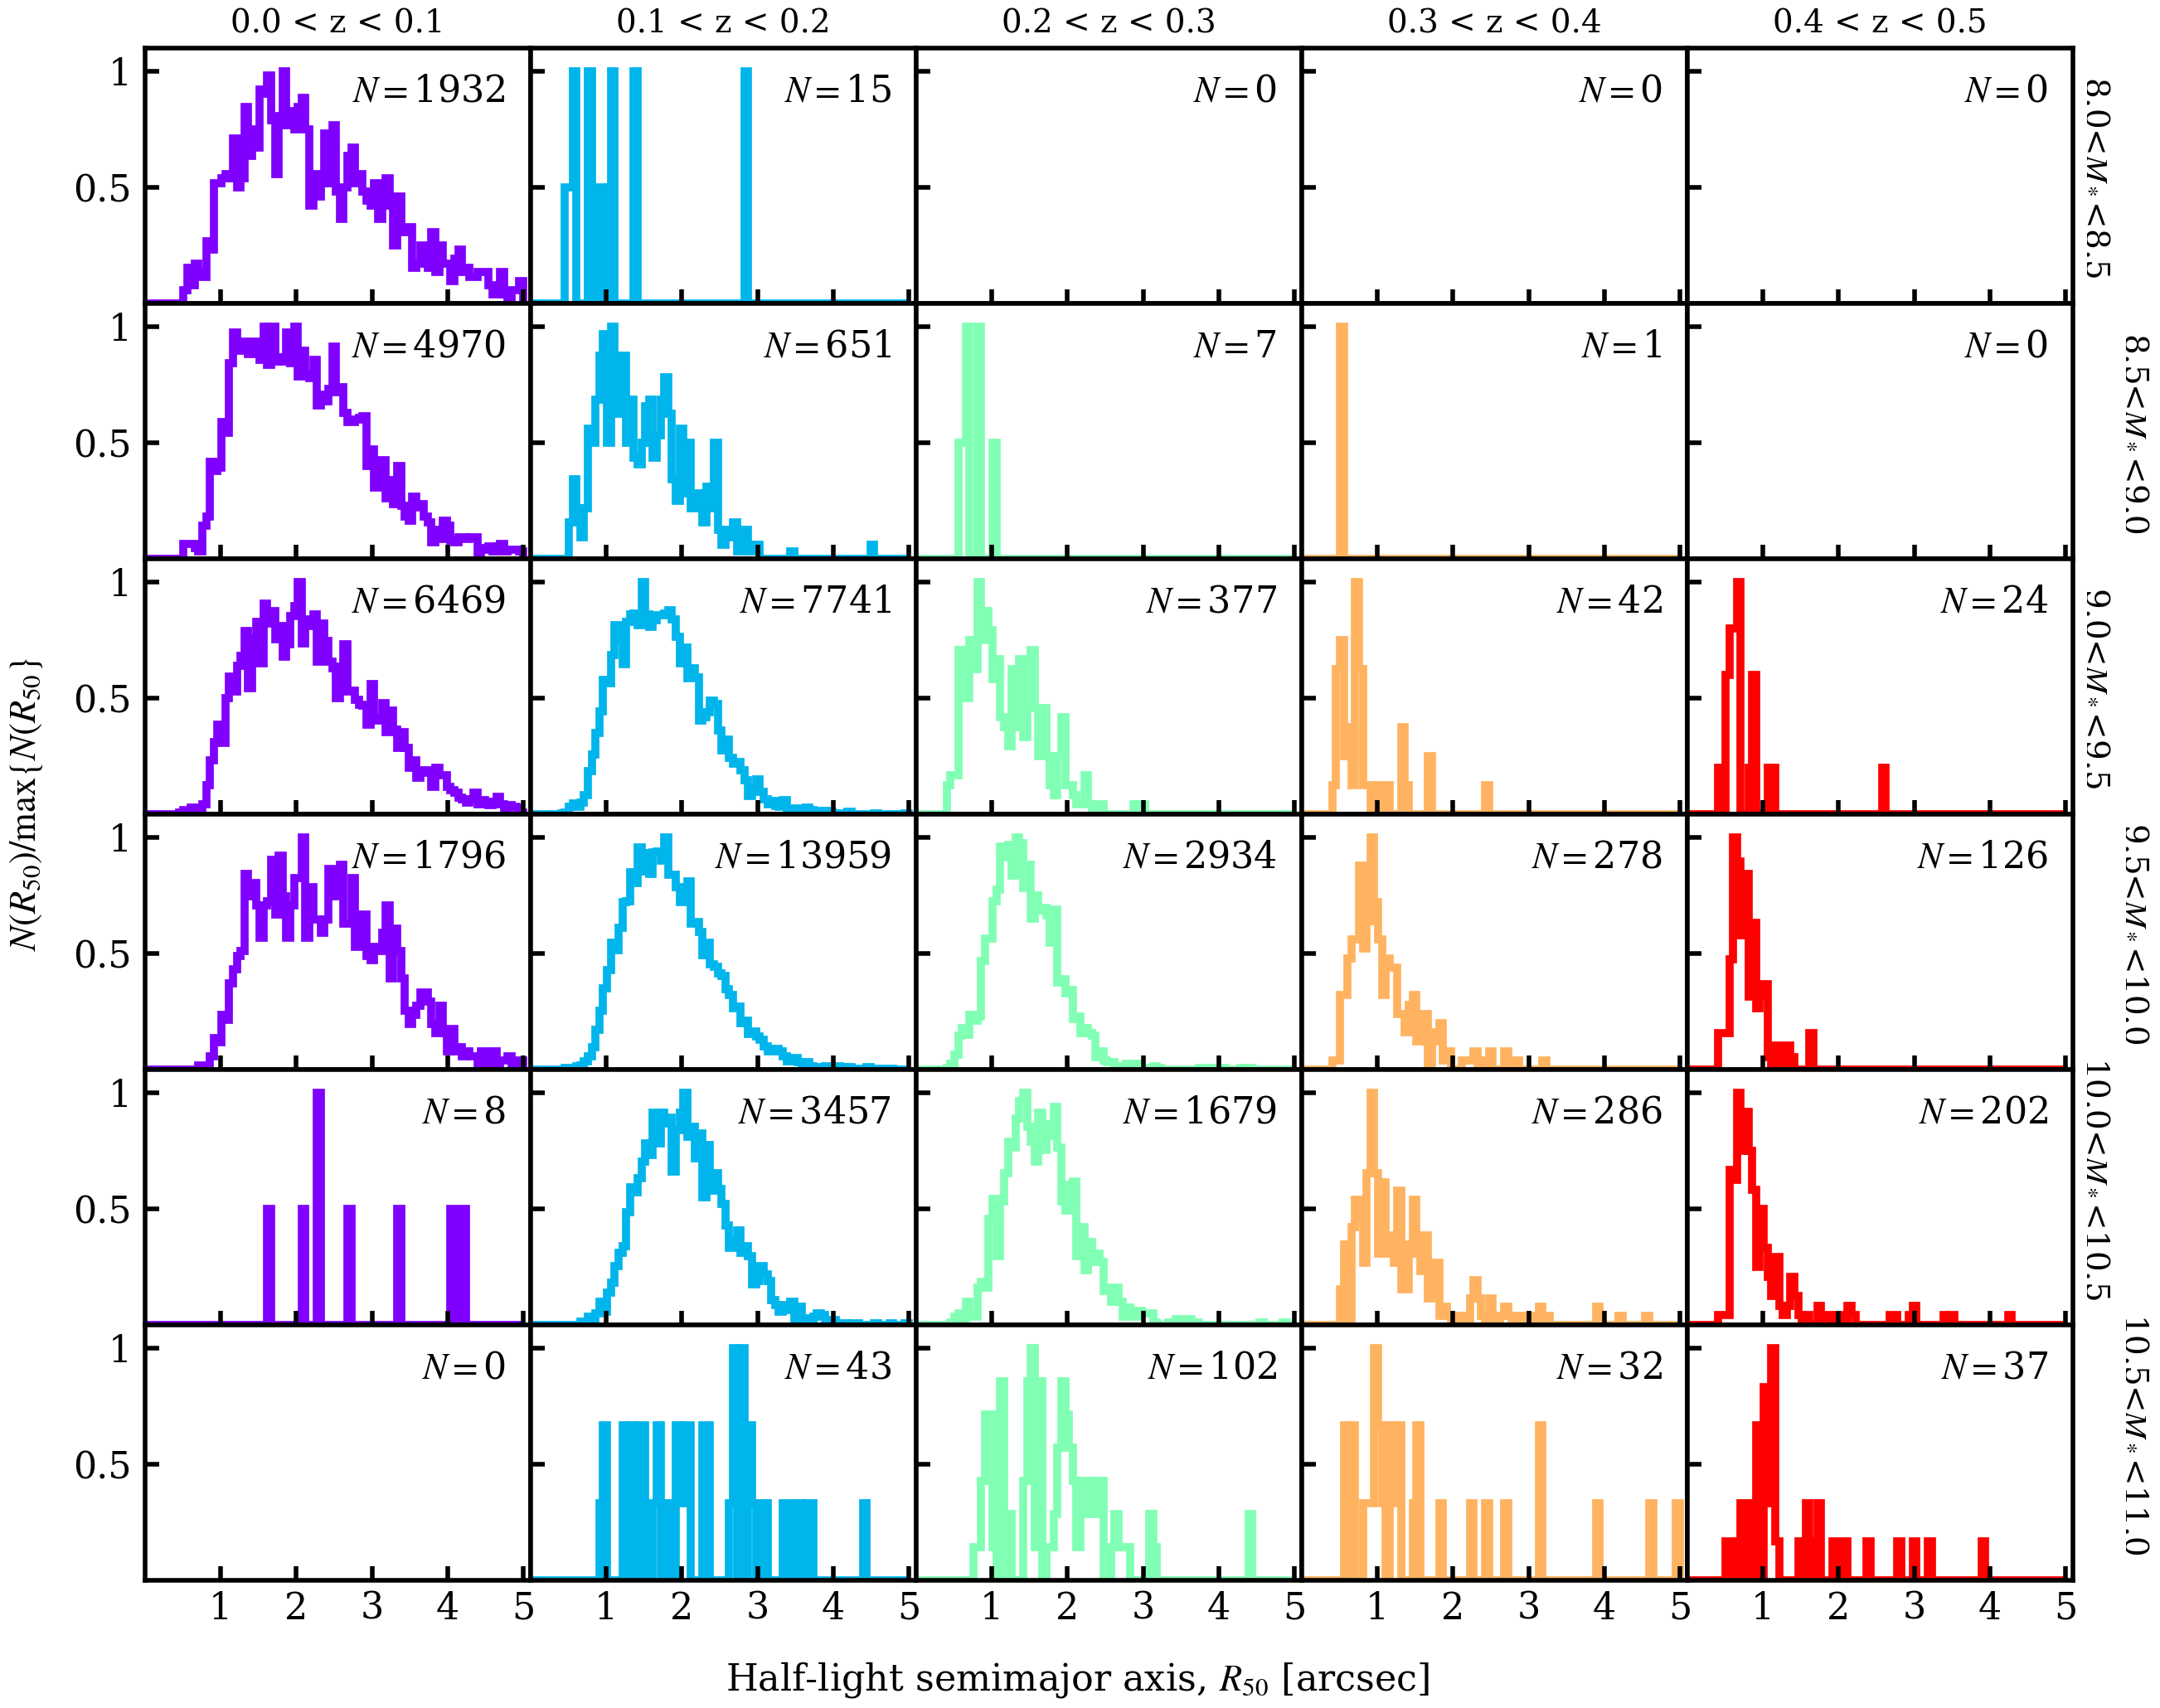

In [168]:
fig = plt.figure(figsize = (30, 24))

gs = fig.add_gridspec(6, 5)

bins = np.linspace(0, 5, 100)

for z_idx in range(0, 5):
    for mstar_idx in range(0, 6):
        
        z_binning = (z_idx * 0.1 < cat_z) &\
                    (cat_z < z_idx * 0.1 + 0.1)
        
        mstar_binning = (8 + mstar_idx/2 < cat_mstar) &\
                        (cat_mstar < 8.5 + mstar_idx/2)
        
        this_bin = z_binning & mstar_binning
        
        ax = fig.add_subplot(gs[mstar_idx, z_idx])

        vals, bins = np.histogram(cat_R50[this_bin], bins = bins)
        
        ax.stairs(vals/np.max(vals), bins,
                  color = mpl.cm.rainbow(z_idx/4), linewidth = 7)

        ax.set_xticks([1, 2, 3, 4, 5],
                      minor = True)
        ax.tick_params(axis = 'both', which = 'major', direction = 'in',
                       length = 12.5, width = 4)
        
        ax.tick_params(axis = 'both', which = 'minor', direction = 'in',
                       length = 8, width = 4)

        ax.set_ylim(0, 1.1)
        ax.set_xlim(0, 5.1)
        ax.set_xticks([1, 2, 3, 4, 5], [], y = -0.025)
        ax.set_yticks([0.5, 1], [], x = -0.025)

        ax.legend(title = f'$N =${np.sum(this_bin)}',
                  title_fontsize = 32, frameon = False)

        for axis in ['left', 'right', 'top', 'bottom']:
            ax.spines[axis].set_linewidth(4)

        if mstar_idx == 0:
            ax.set_title(f'{(z_idx * 0.1):.1f} < z < {(z_idx * 0.1 + 0.1):.1f}',
                         fontsize = 28, y = 1.035)

        if z_idx == 4:
            ax.text(1.025 + (mstar_idx%2)/10, 0.125, f'{8 + mstar_idx/2}<$M_*$<{8.5 + mstar_idx/2}',
                    rotation = 270, transform = ax.transAxes, fontsize = 28)

        if z_idx == 0:
            ax.set_yticklabels(['0.5', '1'], fontsize = 32)

        if mstar_idx == 5:
            ax.set_xticklabels(['1', '2', '3', '4', '5'], fontsize = 32)

fig.supxlabel('Half-light semimajor axis, $R_{50}$ [arcsec]', fontsize = 32, y = 0.05)
fig.supylabel('$N(R_{50})/\max\{N(R_{50}\}$', fontsize = 32, x = 0.07)

plt.subplots_adjust(hspace = 0, wspace = 0)

fig.savefig('/data2/lsajkov/mpdg/figures/GAMA/size_dependence_z_mstar',
            bbox_inches = 'tight')

<>:38: SyntaxWarning: invalid escape sequence '\S'
<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\S'
<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\m'
/var/tmp/lsajkov/ipykernel_2936566/308910996.py:38: SyntaxWarning: invalid escape sequence '\S'
  ax.legend(title = f'$\Sigma =${np.sum(this_bin)}',
/var/tmp/lsajkov/ipykernel_2936566/308910996.py:44: SyntaxWarning: invalid escape sequence '\o'
  ax.set_title(f'{8 + mstar_idx} < log $(M_*/M_{"\odot"})$ < {9 + mstar_idx}',
/var/tmp/lsajkov/ipykernel_2936566/308910996.py:62: SyntaxWarning: invalid escape sequence '\m'
  fig.supylabel('$N(R_{50})/\max\{N(R_{50}\}$', fontsize = 32, x = 0.07)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legen

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/tmp/lsajkov/ipykernel_2936566/308910996.py:22: RuntimeWarning: invalid value encountered in divide
  ax.stairs(vals/np.max(vals), bins,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose la

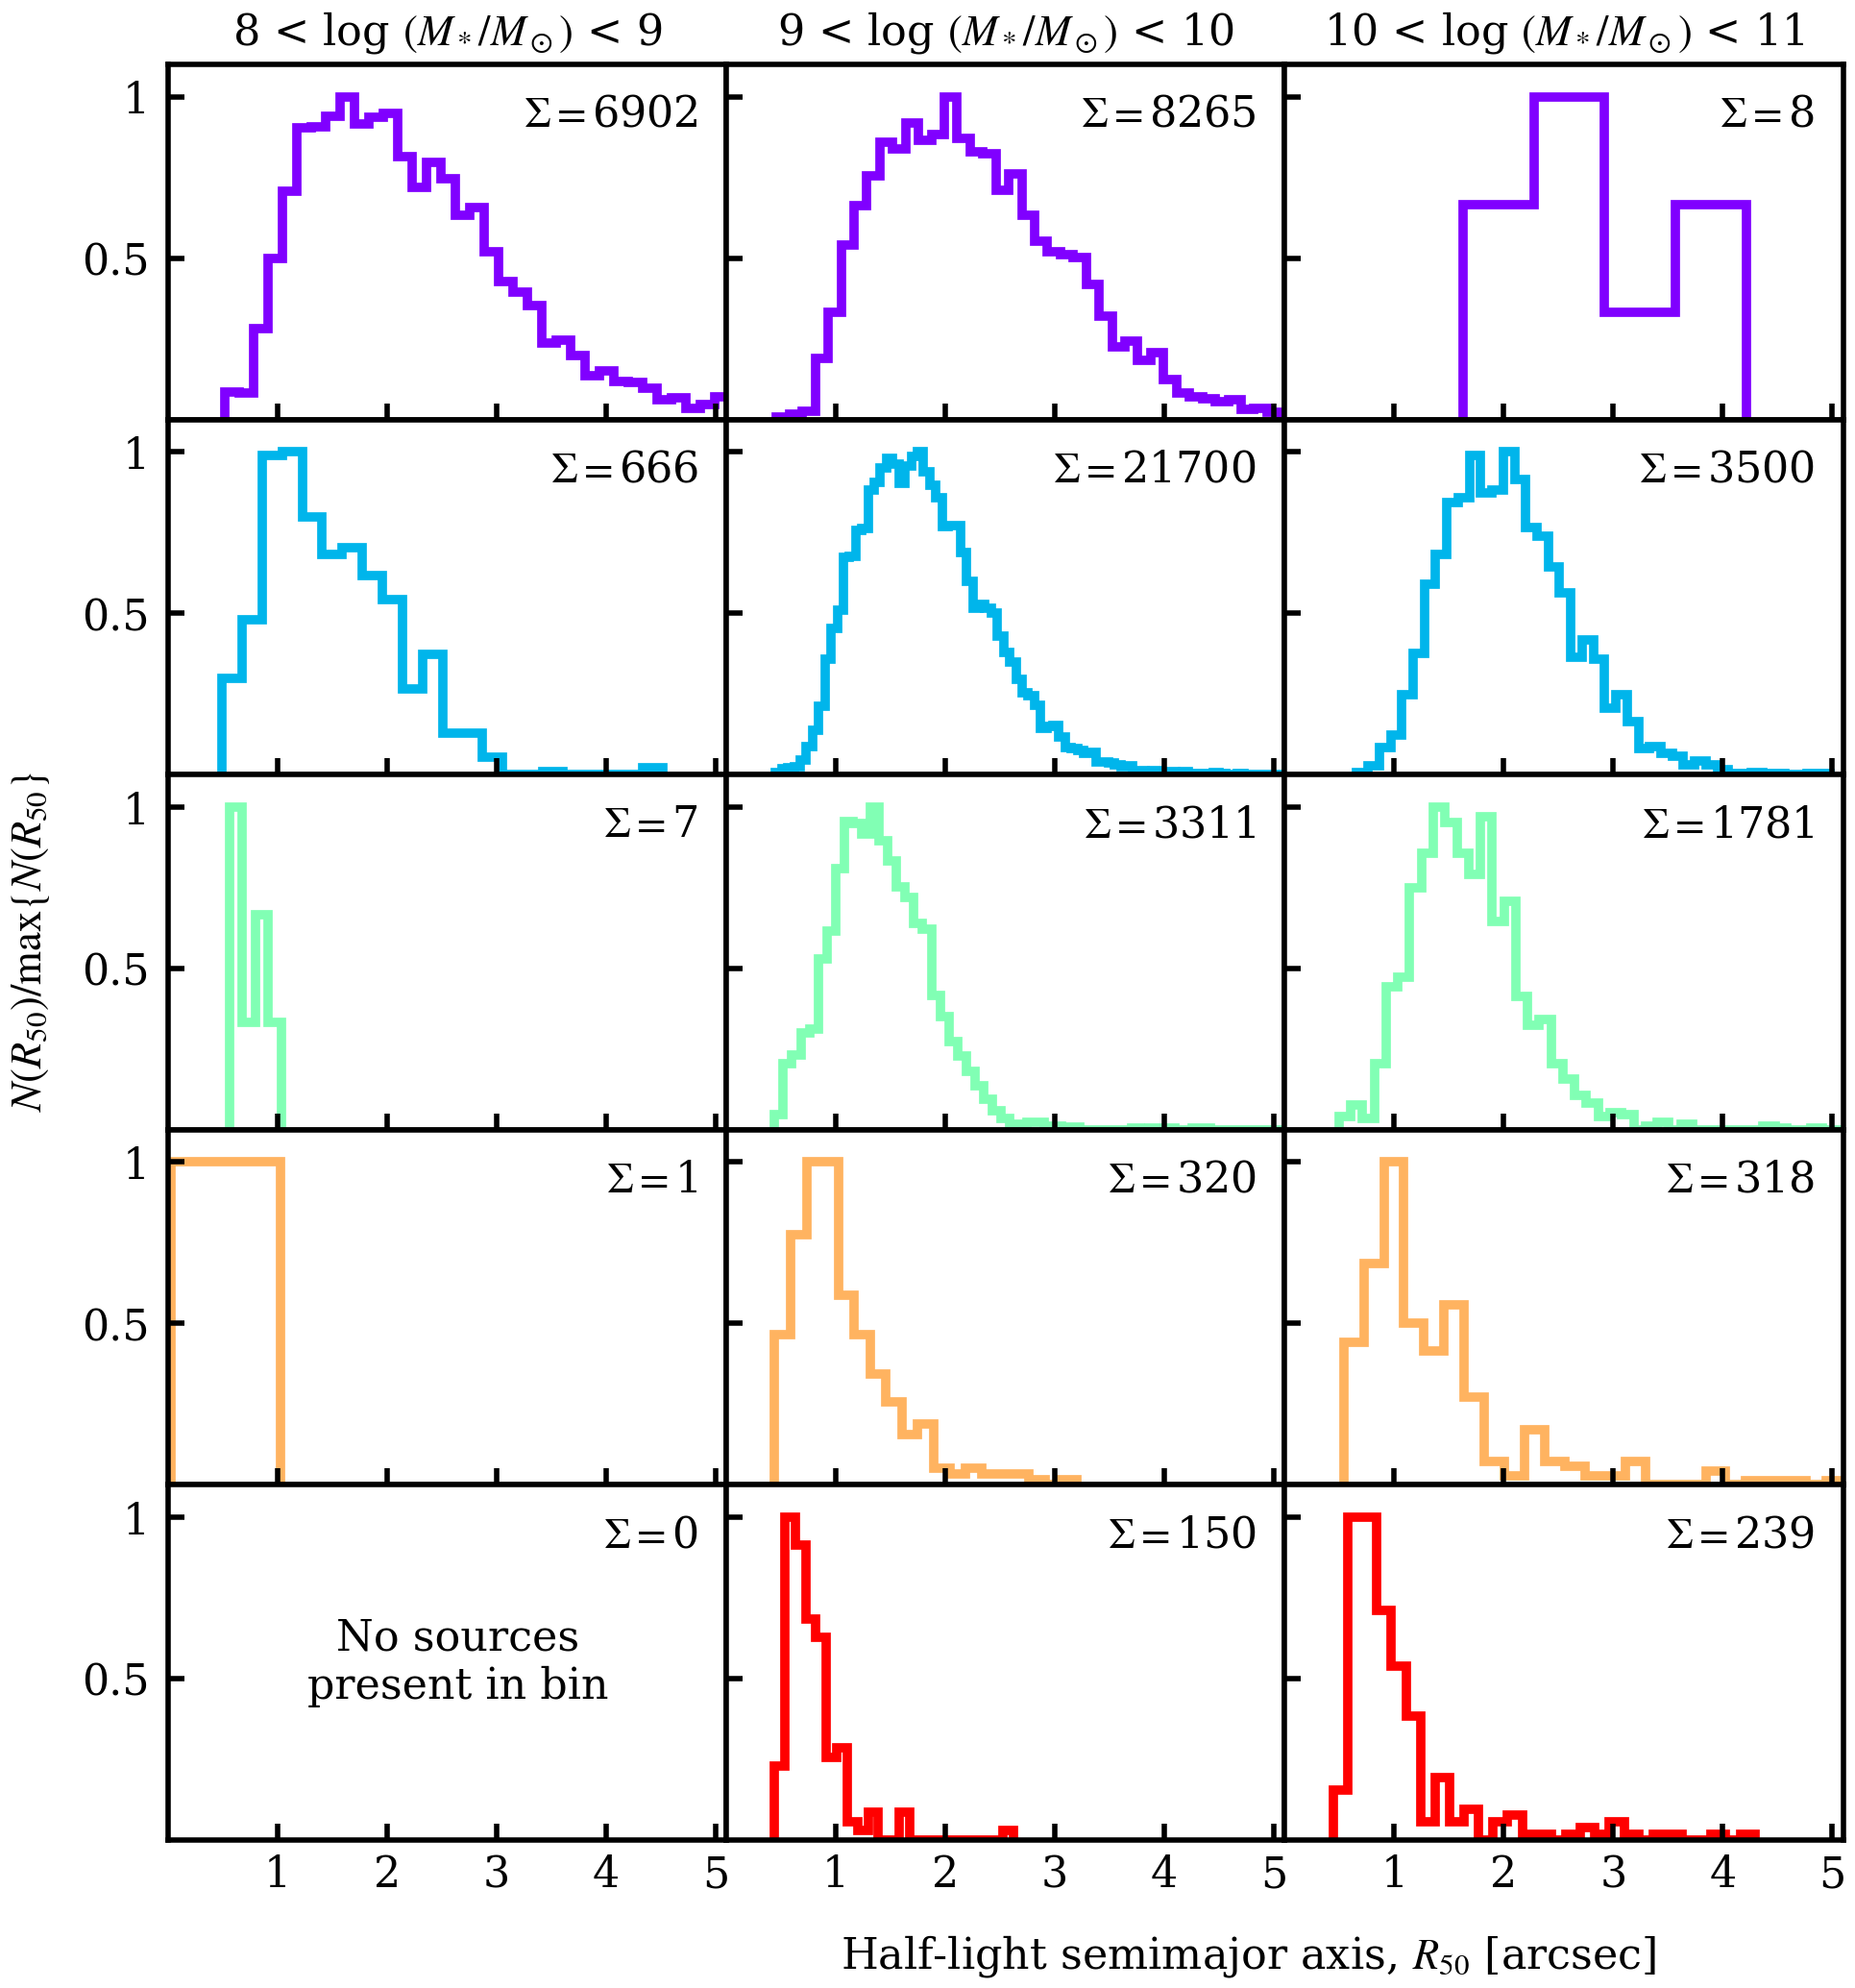

In [140]:
fig = plt.figure(figsize = (30, 24))

gs = fig.add_gridspec(5, 4)

# bins = np.linspace(0, 5, 100)

for mstar_idx in range(0, 3):
    for z_idx in range(0, 5):
        
        z_binning = (z_idx * 0.1 < cat_z) &\
                    (cat_z < z_idx * 0.1 + 0.1)
        
        mstar_binning = (8 + mstar_idx < cat_mstar) &\
                        (cat_mstar < 9 + mstar_idx)
        
        this_bin = z_binning & mstar_binning
        
        ax = fig.add_subplot(gs[z_idx, mstar_idx])

        vals, bins = np.histogram(cat_R50[this_bin], bins = 'auto')
        
        ax.stairs(vals/np.max(vals), bins,
                  color = mpl.cm.rainbow(z_idx/4), linewidth = 7)

        ax.set_xticks([1, 2, 3, 4, 5],
                      minor = True)
        ax.tick_params(axis = 'both', which = 'major', direction = 'in',
                       length = 12.5, width = 4)
        
        ax.tick_params(axis = 'both', which = 'minor', direction = 'in',
                       length = 8, width = 4)

        ax.set_ylim(0, 1.1)
        ax.set_xlim(0, 5.1)
        ax.set_xticks([1, 2, 3, 4, 5], [], y = -0.025)
        ax.set_yticks([0.5, 1], [], x = -0.025)

        ax.legend(title = f'$\Sigma =${np.sum(this_bin)}',
                  title_fontsize = 32, frameon = False)

        for axis in ['left', 'right', 'top', 'bottom']:
            ax.spines[axis].set_linewidth(4)
        if z_idx == 0:
            ax.set_title(f'{8 + mstar_idx} < log $(M_*/M_{"\odot"})$ < {9 + mstar_idx}',
                         fontsize = 32, y = 1.035)

        if mstar_idx == 3:
            ax.text(1.025, 0.125, f'{(z_idx * 0.1):.1f} < z < {(z_idx * 0.1 + 0.1):.1f}',
                    rotation = 270, transform = ax.transAxes, fontsize = 32)

        if mstar_idx == 0:
            ax.set_yticklabels(['0.5', '1'], fontsize = 32)

        if z_idx == 4:
            ax.set_xticklabels(['1', '2', '3', '4', '5'], fontsize = 32)

        if (z_idx == 4) & (mstar_idx == 0):
            ax.text(0.25, 0.4, 'No sources\npresent in bin', fontsize = 32, ma = 'center',
                    transform = ax.transAxes)

fig.supxlabel('Half-light semimajor axis, $R_{50}$ [arcsec]', fontsize = 32, y = 0.05)
fig.supylabel('$N(R_{50})/\max\{N(R_{50}\}$', fontsize = 32, x = 0.07)

plt.subplots_adjust(hspace = 0, wspace = 0)

# fig.savefig('/data2/lsajkov/mpdg/figures/GAMA/size_dependence_z_mstar',
#             bbox_inches = 'tight')

## KiDS catalog

In [2]:
with fits.open('/data2/lsajkov/mpdg/data_products/KiDS/KiDS_SOM_catalog_15Jul24.fits') as cat:
    KiDS_cat = Table(cat[1].data)

In [14]:
KiDS_size_cut = (KiDS_cat['half_light_radius'] < 3) &\
                (KiDS_cat['half_light_radius'] > 0)

R50      = KiDS_cat[KiDS_size_cut]['half_light_radius']
redshift = KiDS_cat[KiDS_size_cut]['redshift']

<>:25: SyntaxWarning: invalid escape sequence '\ '
<>:25: SyntaxWarning: invalid escape sequence '\ '
/var/tmp/lsajkov/ipykernel_2508276/1785737292.py:25: SyntaxWarning: invalid escape sequence '\ '
  fig.supxlabel('Half-light-radius [arcsec]\n($cut\ at\ 3\ arcsec$)')


Text(0.02, 0.5, 'Log count')

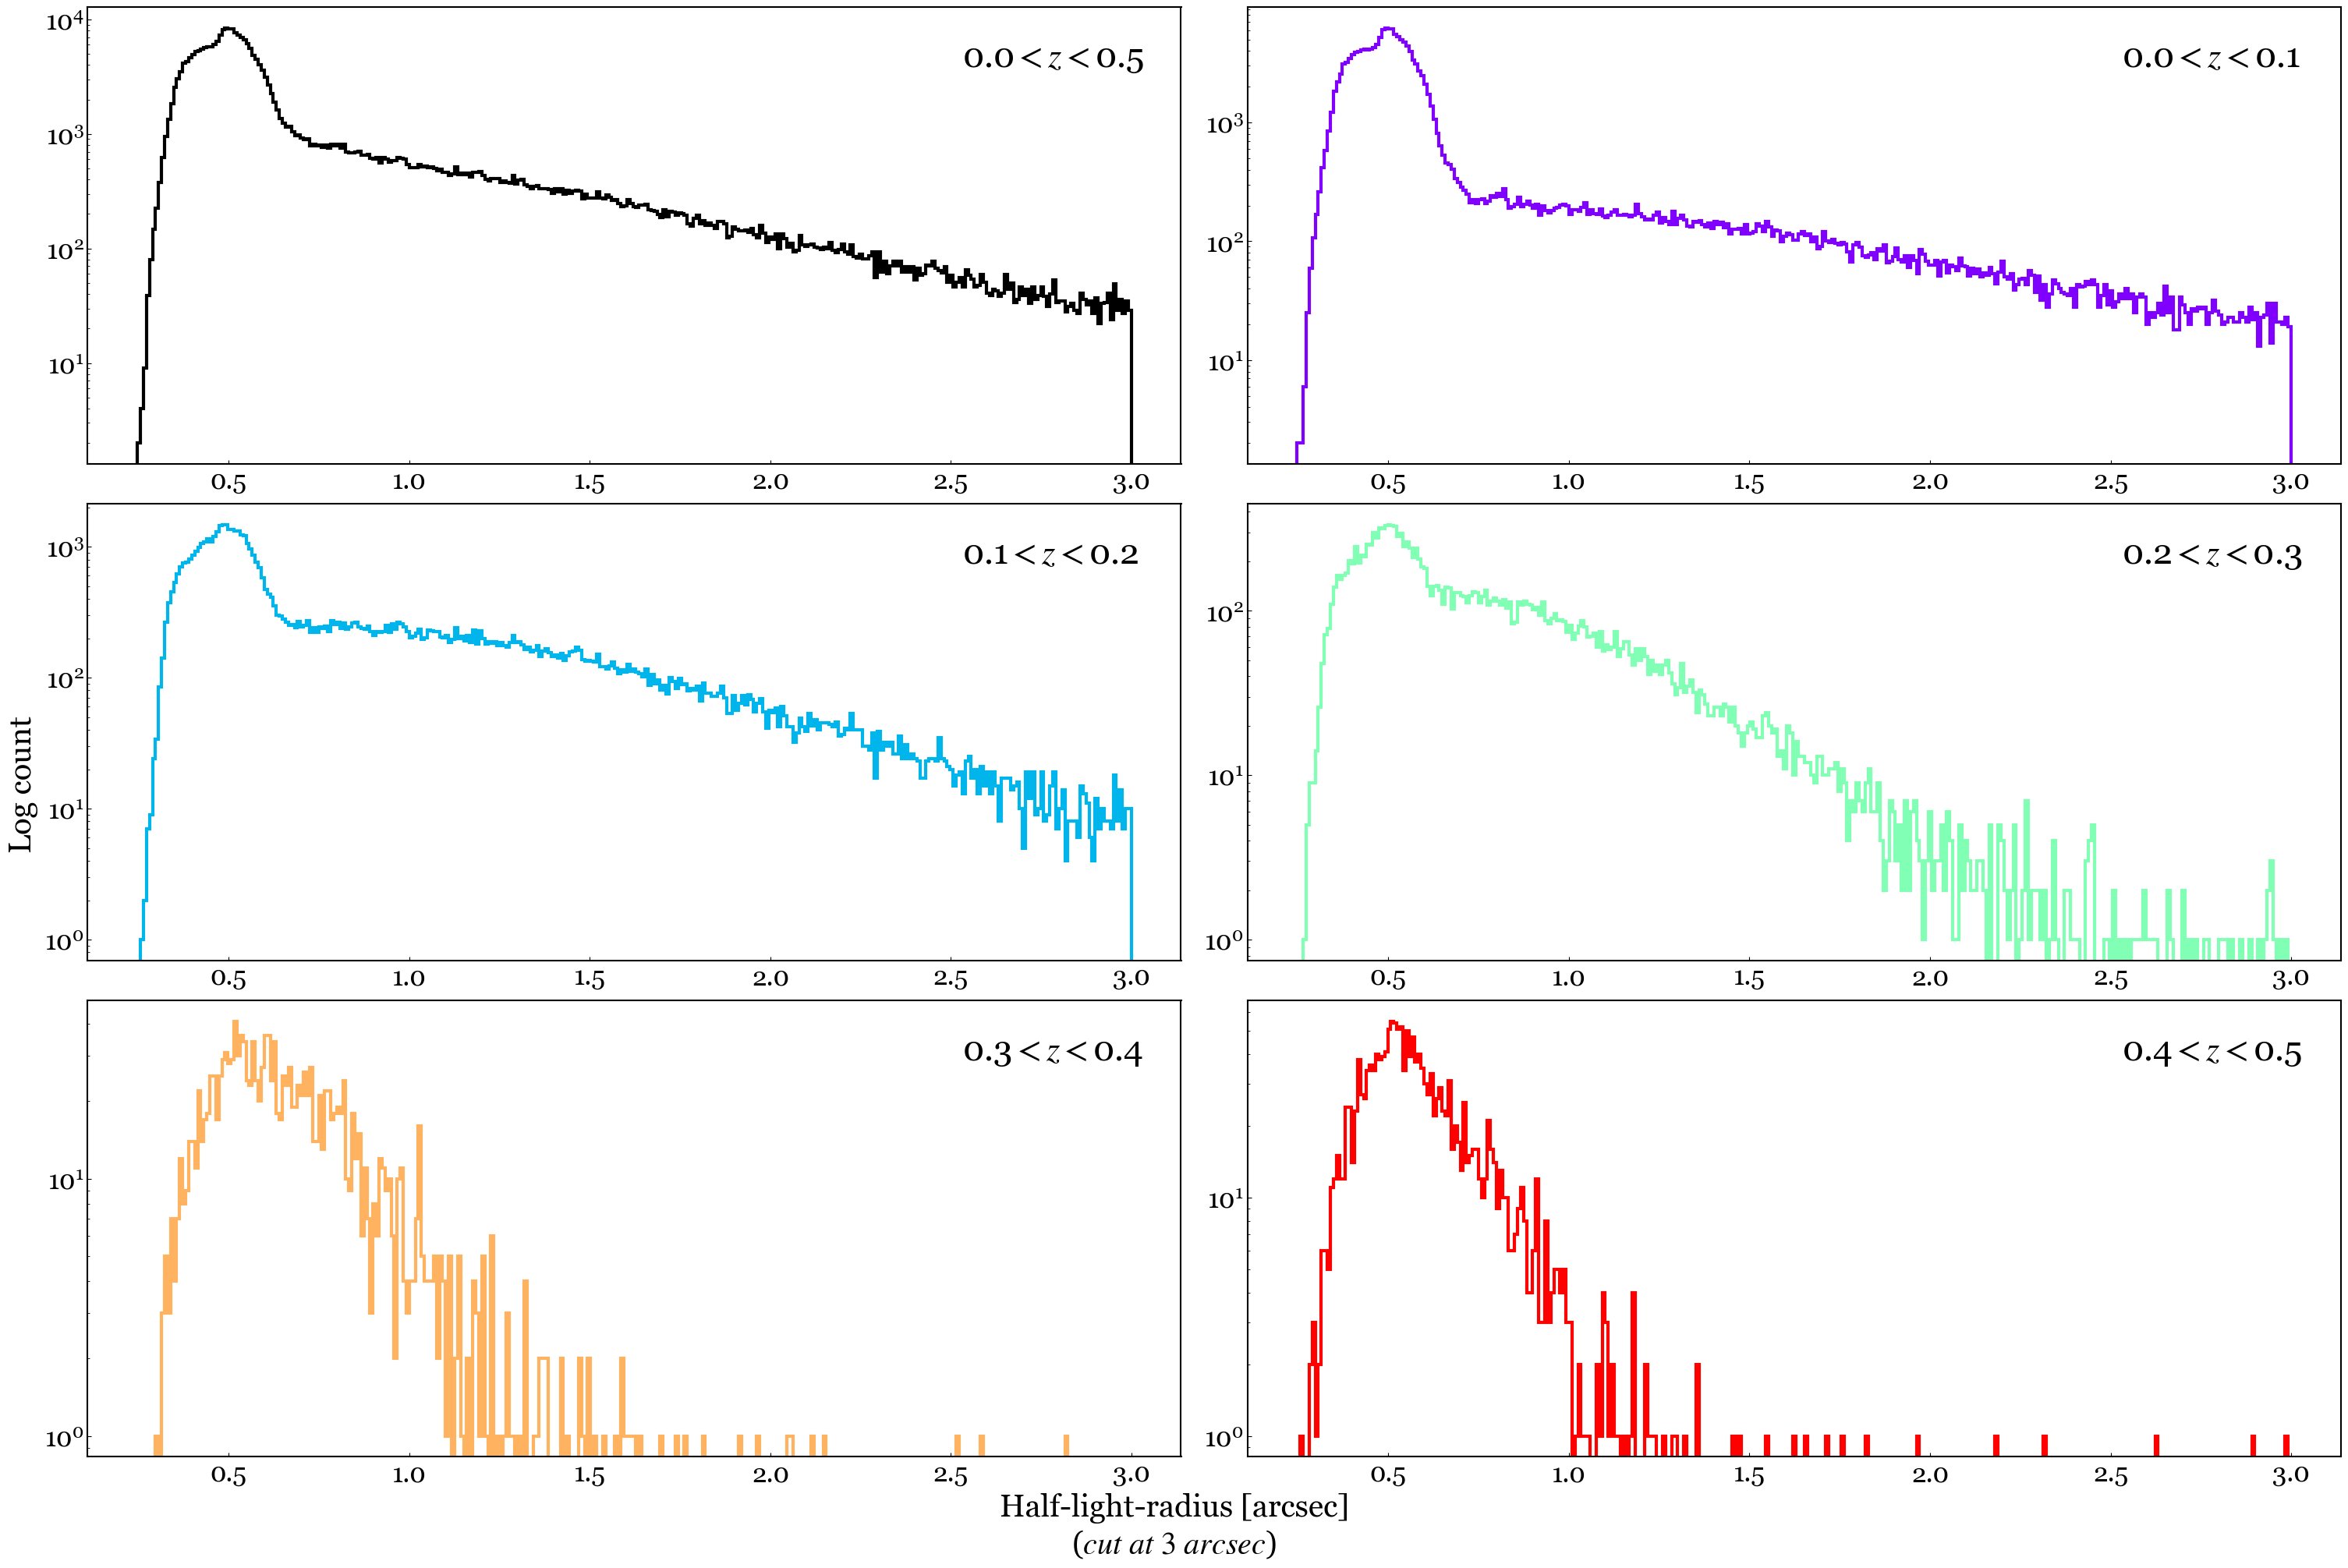

In [32]:
fig = plt.figure(figsize = (30, 20),
                 constrained_layout = True)

ax = fig.add_subplot(3, 2, 1)

bins = ax.hist(R50, bins = 'auto',
               histtype = 'step', color = 'black', linewidth = 3)[1]
    
ax.text(0.8, 0.87, f'0.0$< z <$0.5',
            transform = ax.transAxes, fontsize = 32)
ax.set_yscale('log')

for index in range(5):
    redshift_bin = (redshift > index * 0.10) &\
                   (redshift <= (index + 1) * 0.10)
    
    ax = fig.add_subplot(3, 2, index + 2)
    ax.hist(R50[redshift_bin], bins = bins,
            histtype = 'step', color = plt.cm.rainbow(index/4), linewidth = 3)
    
    ax.text(0.8, 0.87, f'{index* 0.10:.1f}$< z <${(index + 1) * 0.10:.1f}',
            transform = ax.transAxes, fontsize = 32)
    ax.set_yscale('log')
    
fig.supxlabel('Half-light-radius [arcsec]\n($cut\ at\ 3\ arcsec$)')
fig.supylabel('Log count')